# Модели посимвольного встраивания слов в векторное пространство - визуализация обучения

In [72]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Загружаем данные об обучении разных архитектур сетки (learning curve)

In [113]:
# lstm over cnn:
df_cnn_lstm = pd.read_csv(u'../../tmp/learning_curve_(cnn)lstm_vecsize=56_tunable_char_embeddings=False.csv', encoding='utf-8', delimiter='\t', index_col=None, header=None )

# cnn
df_cnn = pd.read_csv(u'../../tmp/learning_curve_cnn_vecsize=56_tunable_char_embeddings=0.csv', encoding='utf-8', delimiter='\t', index_col=None, header=None )

# lstm
df_lstm = pd.read_csv(u'../../tmp/learning_curve_rnn_vecsize=56_tunable_char_embeddings=0.csv', encoding='utf-8', delimiter='\t', index_col=None, header=None )

# bidir lstm
df_bidir_lstm = pd.read_csv(u'../../tmp/learning_curve_bidir_lstm_vecsize=56_tunable_char_embeddings=0.csv', encoding='utf-8', delimiter='\t', index_col=None, header=None )

# lstm+cnn
df_lstm_plus_cnn = pd.read_csv(u'../../tmp/learning_curve_lstm+cnn_vecsize=56_tunable_char_embeddings=0.csv', encoding='utf-8', delimiter='\t', index_col=None, header=None )


## Отрисовываем кривые обучения

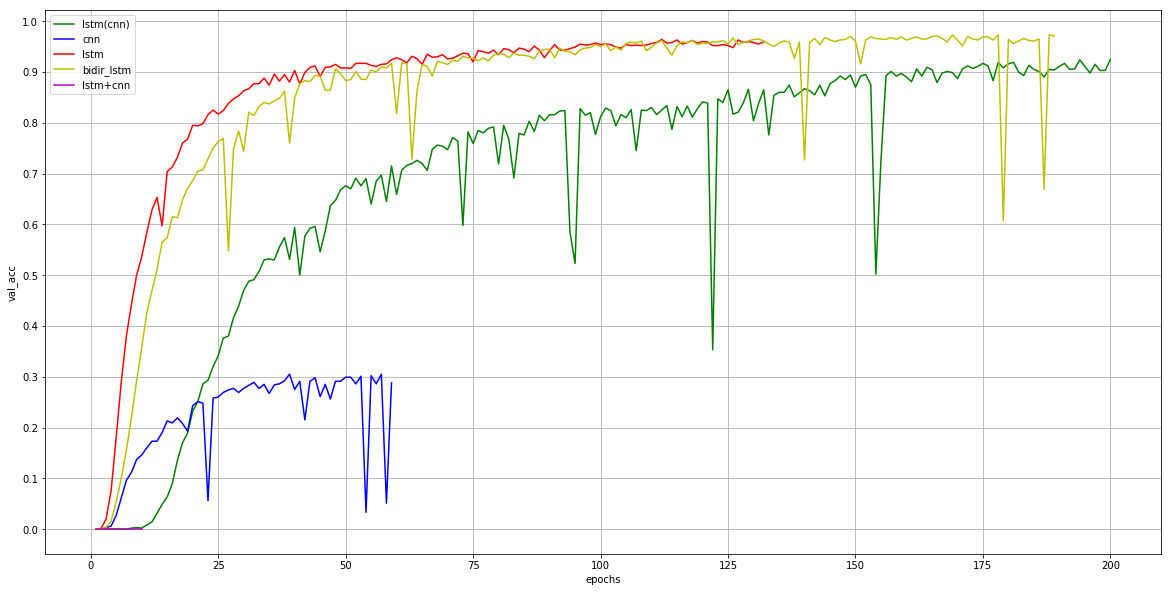

In [114]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0.0, 1.1, 0.1))
for df, label, clr in [(df_cnn_lstm, 'lstm(cnn)', 'g'),
                       (df_cnn, 'cnn', 'b'),
                       (df_lstm, 'lstm', 'r' ),
                       (df_bidir_lstm, 'bidir_lstm', 'y' ),
                       (df_lstm_plus_cnn, 'lstm+cnn', 'm' ),]:
    xdata=df[0].values
    ydata=df[1].values
    plt.plot(xdata, ydata, '-', c=clr, marker=None, label=label)
    #plt.scatter(x=xdata, y=ydata, s=2, c=clr, marker=None, cmap=None, norm=None, alpha=None, linewidths=None, verts=None, edgecolors=None)
    plt.xlabel("epochs")
    plt.ylabel("val_acc")
    plt.legend(loc=2)

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.show()

## Исследование влияния tunable_char_embeddings

In [123]:
# bidir lstm tunable_char_embeddings=1
df_bidir_lstm2 = pd.read_csv(u'../../tmp/learning_curve_bidir_lstm_vecsize=56_tunable_char_embeddings=1.csv', encoding='utf-8', delimiter='\t', index_col=None, header=None )

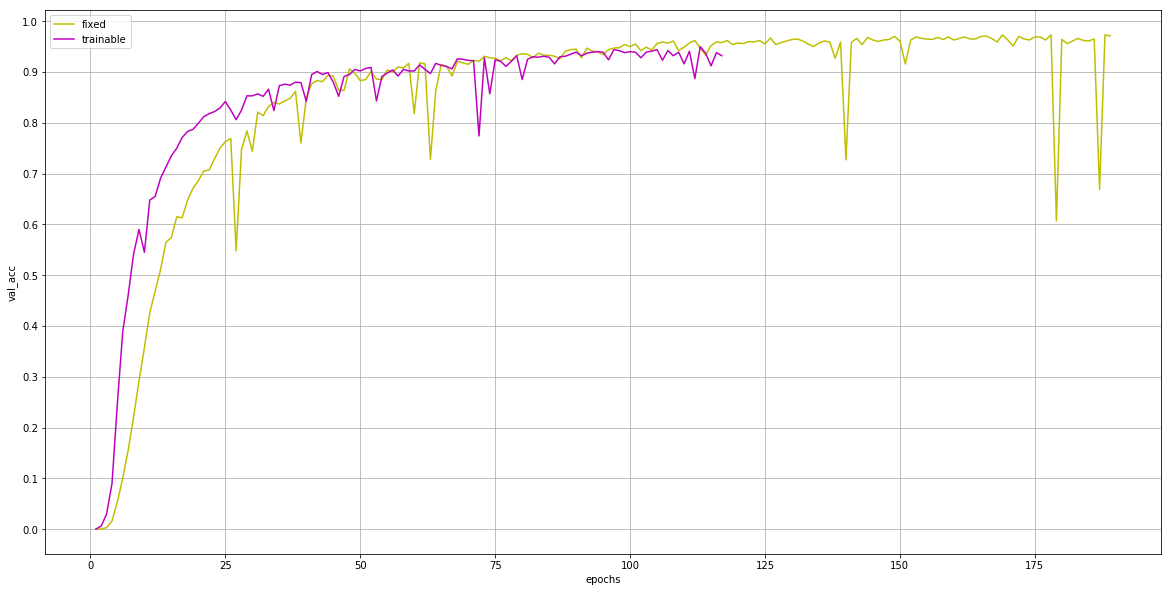

In [124]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0.0, 1.1, 0.1))
for df, label, clr in [(df_bidir_lstm, 'fixed', 'y' ),
                       (df_bidir_lstm2, 'trainable', 'm' ),]:
    xdata=df[0].values
    ydata=df[1].values
    plt.plot(xdata, ydata, '-', c=clr, marker=None, label=label)
    #plt.scatter(x=xdata, y=ydata, s=2, c=clr, marker=None, cmap=None, norm=None, alpha=None, linewidths=None, verts=None, edgecolors=None)
    plt.xlabel("epochs")
    plt.ylabel("val_acc")
    plt.legend(loc=2)

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.show()